# EDA - Análisis Exploratorio de Datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/train_dataset.csv", parse_dates=["datetime"])
df.head()

,machineID,datetime,volt_mean,volt_std,rotate_mean,rotate_std,pressure_mean,pressure_std,vibration_mean,vibration_std,failure_within_24h,model,age
0,1,2015-01-01 06:00:00,176.217853,NaN,418.504078,NaN,113.077935,NaN,45.087686,NaN,0,model3,18
1,53,2015-01-01 06:00:00,183.084582,NaN,420.980061,NaN,109.235805,NaN,45.737760,NaN,0,model3,5
2,99,2015-01-01 06:00:00,168.596133,NaN,384.747105,NaN,110.921131,NaN,41.944692,NaN,1,model1,14
3,12,2015-01-01 06:00:00,171.404215,NaN,576.923563,NaN,97.145400,NaN,47.725909,NaN,0,model3,9
4,6,2015-01-01 06:00:00,136.878588,NaN,492.088420,NaN,149.003582,NaN,22.973289,NaN,0,model3,7


## Información general

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453806 entries, 0 to 453805
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   machineID           453806 non-null  int64         
 1   datetime            453806 non-null  datetime64[ns]
 2   volt_mean           453806 non-null  float64       
 3   volt_std            453706 non-null  float64       
 4   rotate_mean         453806 non-null  float64       
 5   rotate_std          453706 non-null  float64       
 6   pressure_mean       453806 non-null  float64       
 7   pressure_std        453706 non-null  float64       
 8   vibration_mean      453806 non-null  float64       
 9   vibration_std       453706 non-null  float64       
 10  failure_within_24h  453806 non-null  int64         
 11  model               453806 non-null  object        
 12  age                 453806 non-null  int64         
dtypes: datetime64[ns](1), float64

machineID               0
datetime                0
volt_mean               0
volt_std              100
rotate_mean             0
rotate_std            100
pressure_mean           0
pressure_std          100
vibration_mean          0
vibration_std         100
failure_within_24h      0
model                   0
age                     0
dtype: int64

## Distribución del Target (Falla en las próximas 24h)

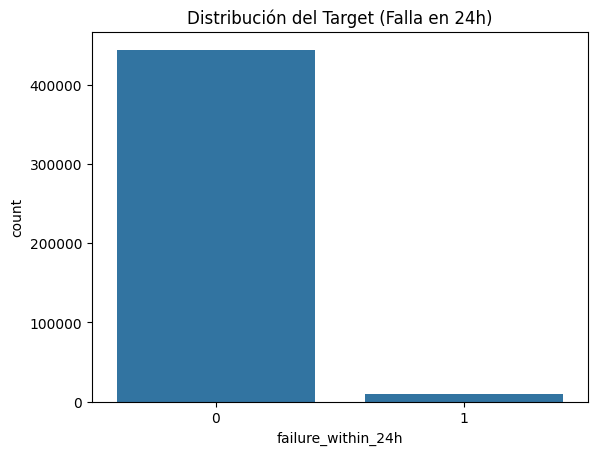

failure_within_24h
0    97.855692
1     2.144308
Name: proportion, dtype: float64

In [4]:
sns.countplot(data=df, x="failure_within_24h")
plt.title("Distribución del Target (Falla en 24h)")
plt.show()

df["failure_within_24h"].value_counts(normalize=True) * 100

## Correlación entre variables numéricas

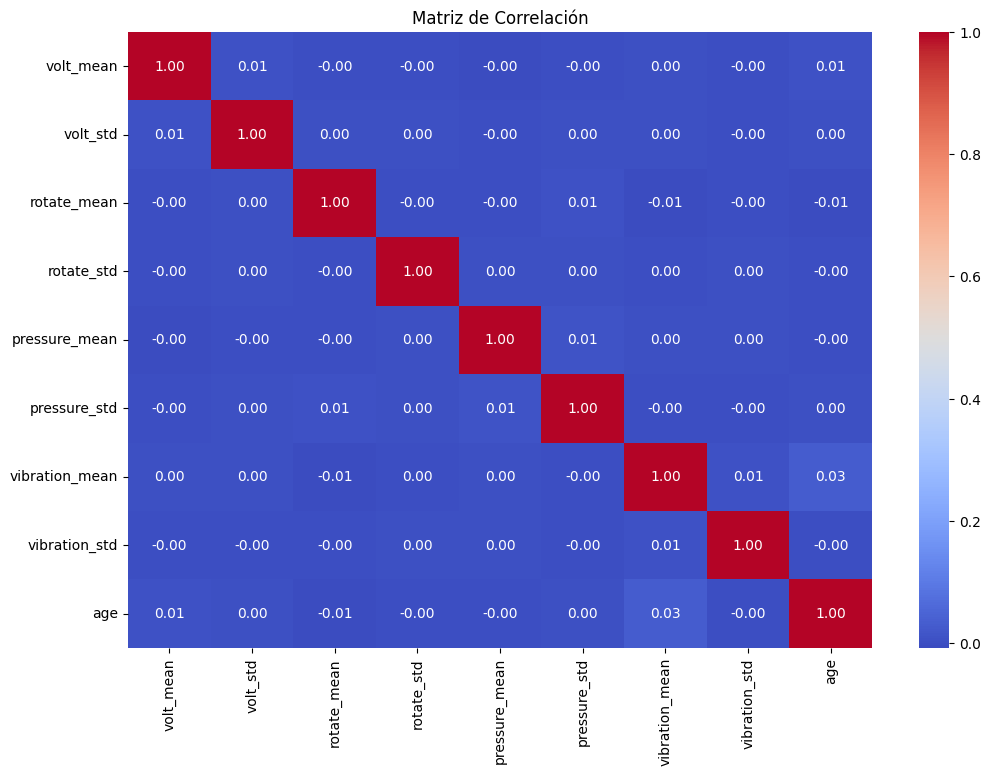

In [5]:
numeric_cols = df.select_dtypes(include="number").drop(columns=["machineID", "failure_within_24h"])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

## Boxplots por clase (0/1) para cada feature

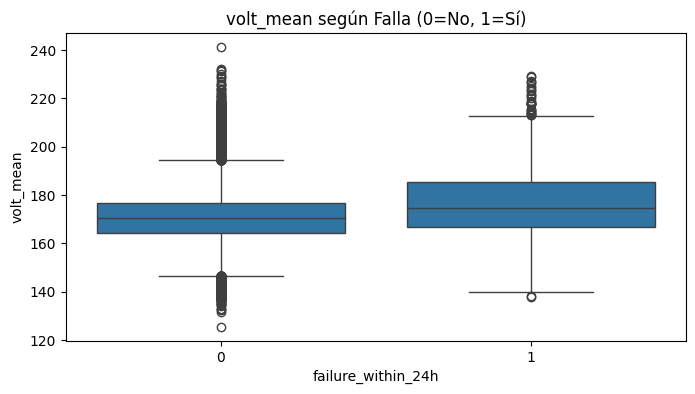

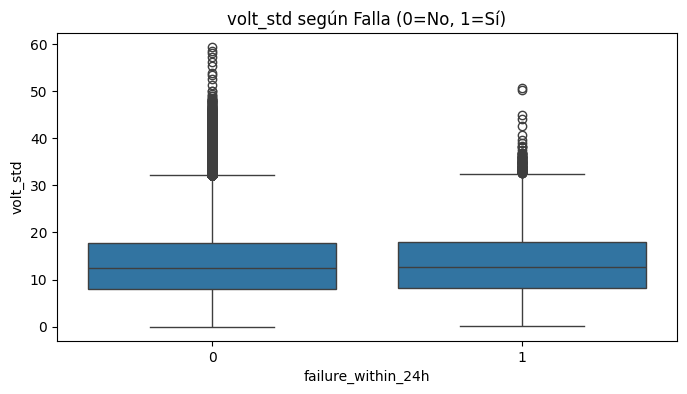

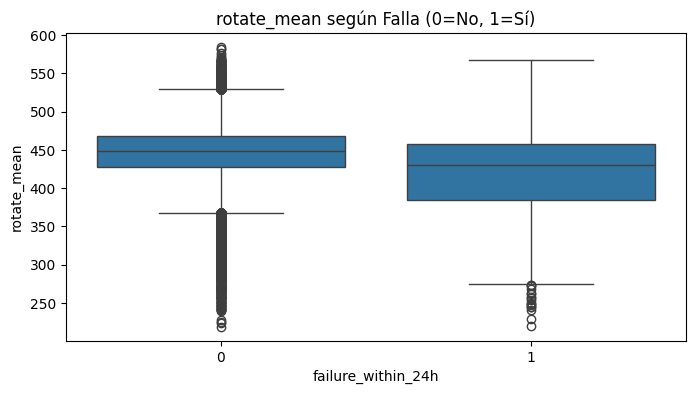

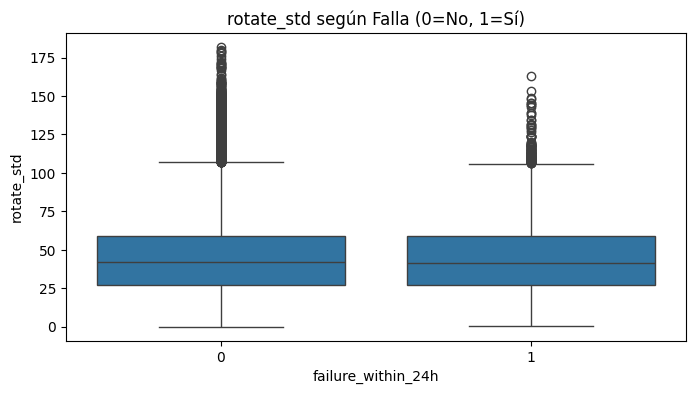

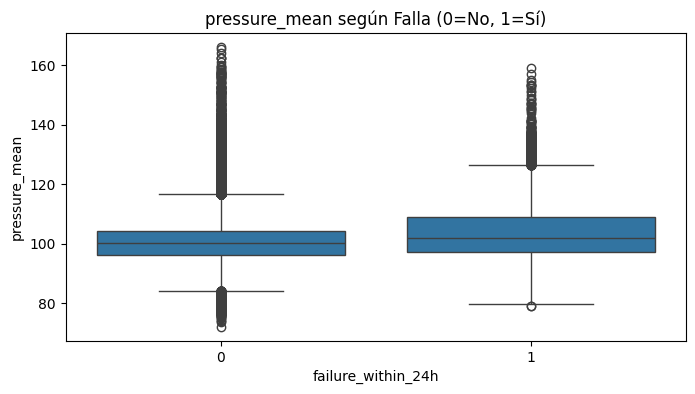

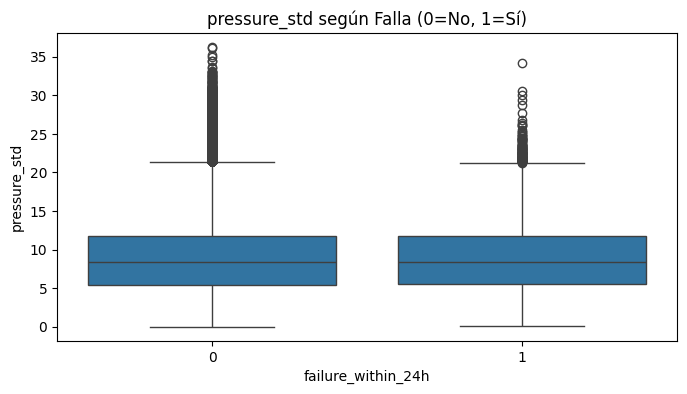

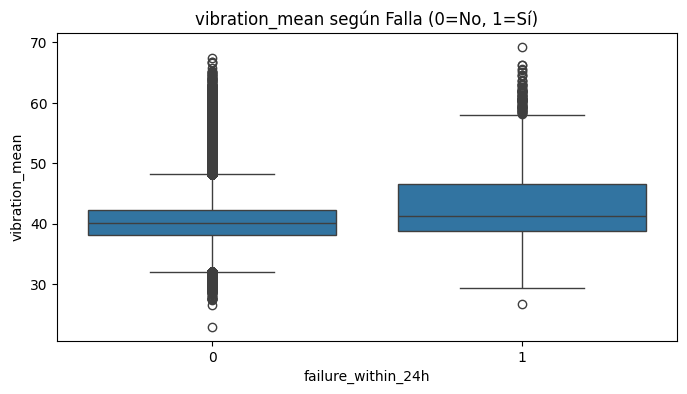

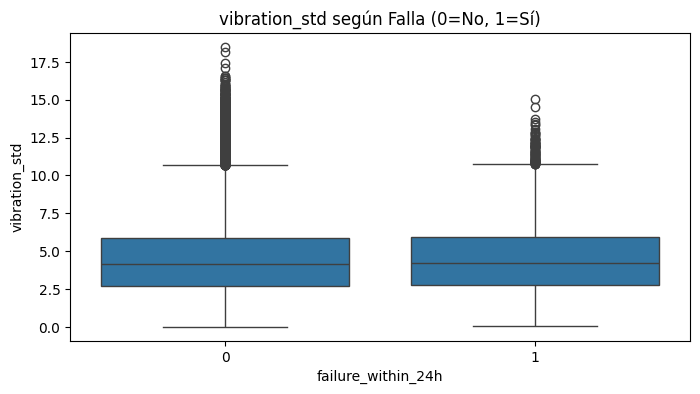

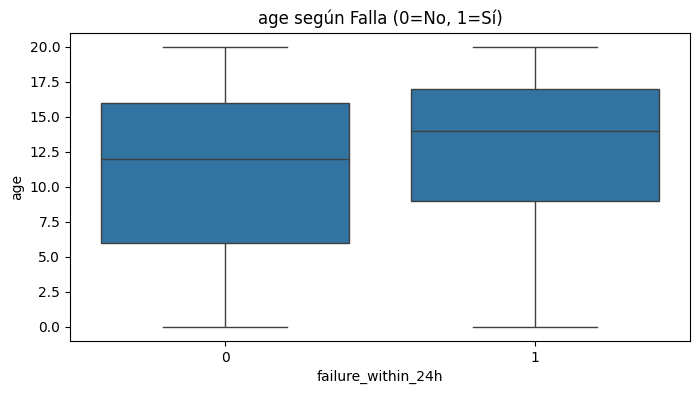

In [6]:
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="failure_within_24h", y=col)
    plt.title(f"{col} según Falla (0=No, 1=Sí)")
    plt.show()

## Variables categóricas: Modelo de máquina y antigüedad

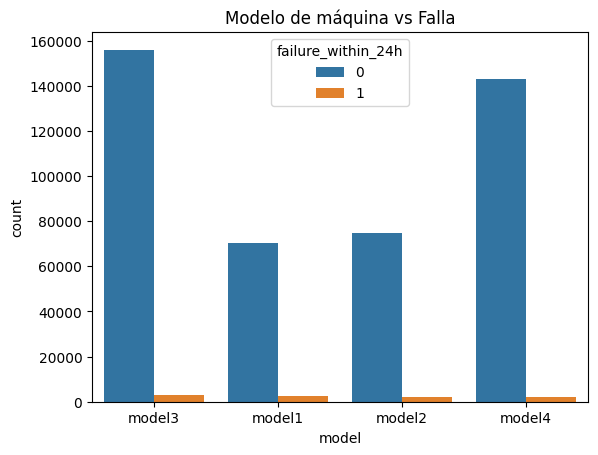

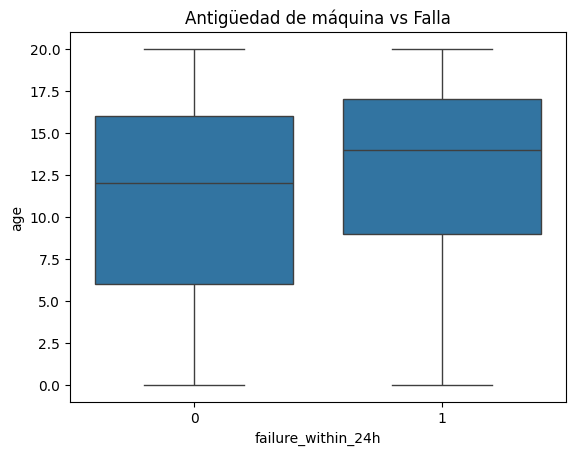

In [7]:
sns.countplot(data=df, x="model", hue="failure_within_24h")
plt.title("Modelo de máquina vs Falla")
plt.show()

sns.boxplot(data=df, x="failure_within_24h", y="age")
plt.title("Antigüedad de máquina vs Falla")
plt.show()

## Fallas en el tiempo

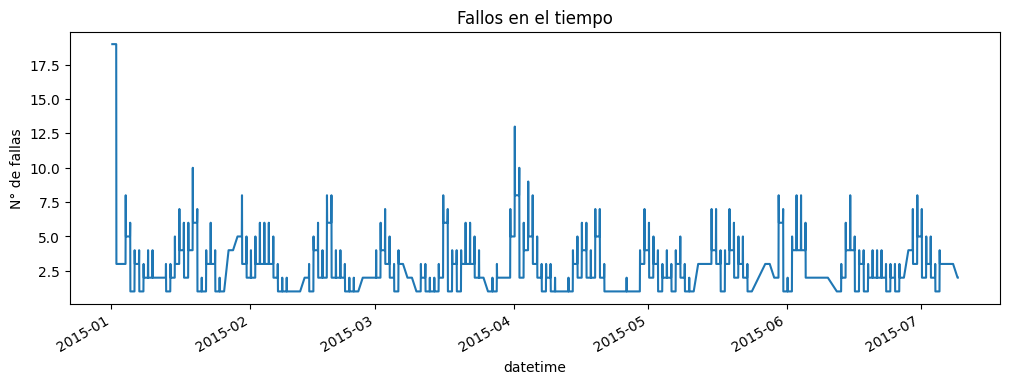

In [8]:
failures_by_date = df[df["failure_within_24h"] == 1].groupby("datetime").size()
failures_by_date.plot(figsize=(12,4), title="Fallos en el tiempo")
plt.ylabel("N° de fallas")
plt.show()

## Conclusiones del EDA
- ¿Qué variables parecen más informativas?
- ¿Cómo está distribuido el target?
- ¿Qué transformaciones aplicarías antes del modelado?